# Aircraft  Accidents Analysis to Determine The Most Viable Aircrafts for Purchase
## Business understanding
### Objective: 
The purpose of this analysis is to look at previous aircraft accidents, so as to come up with an informed decision of the type of aircraft to purchase.



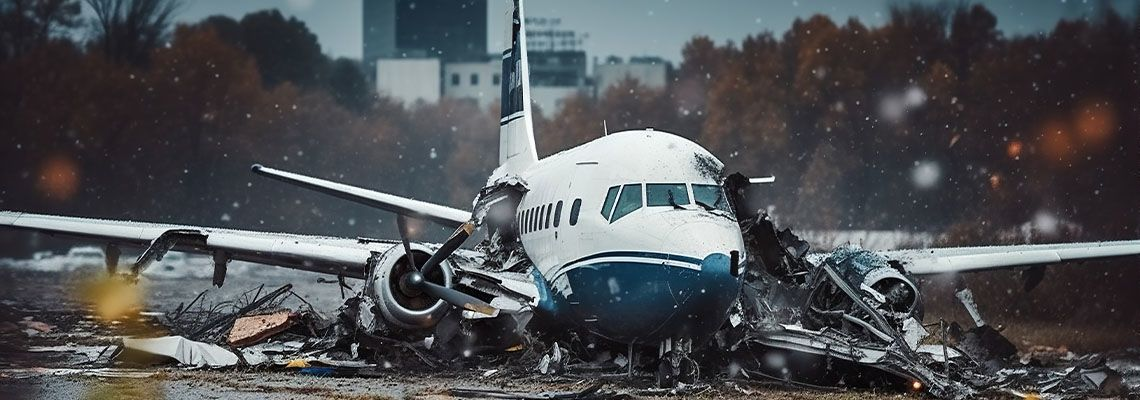

Photo from [WGH&A](https://www.hargeraviationlaw.com/blog/does-the-faa-investigate-accidents/)

### Key Questions
1. Which aircraft make/models have more accidents, and which have less?
2. What is the type of damage that occurs when the accidents happen?
3. Does the type of damage affect number of injuries?
4. What's the most common accident by purpose of flight?
5. Which phase of flight is more prone to accidents?
6. Which weather condition is affected most?



## Data understanding
Our data set for analysis is taken from [Kaggle](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) compiled by the National Transportation Safety Board  that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.
The data is a csv file.

### Data overview:
The dataset hasa the following data:
- Event Details : ID, Accident Number, Event Date, Location, Country, Airport information
- Aircraft details: Registration number, Make, Model, Number of engines, Engine type, Schedule, Purpose of flight Type of damage.
- Injuries: Fatal injuries, Serious injuries, Minor injuries, Uninjured 
- Weather condition
- Report status
- Publication date


# 1. Getting the data and exploring
To extract the data I'll use pandas library so as to get a data frame which will be convinient for exploring and cleaning the data

In [1]:
#for data manipulation and analysis
import pandas as pd

In [2]:
#We will call our data frame df
df = pd.read_csv('AviationData.csv',encoding='latin-1' )
df.head() #call the first 5 rows of the data set to get an overview

C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country Latitude Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States      NaN       NaN          NaN   
1   BRIDGEPORT, CA  United States      NaN       NaN          NaN   
2    Saltville, VA  United States  36.9222  -81.8781          NaN   
3       EUREKA, CA  United States      NaN       NaN          NaN   
4       Canton, OH  United States      NaN       NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1          NaN  ...          Personal         NaN                  4.0   
2          NaN  ...          Personal         NaN                  3.0   
3          NaN  ...          Personal         NaN                  2.0   
4          NaN  ...          Personal         NaN                  1.0   

  Total.Serious.Injuries Total.Minor.Injuries Total.Uninjured  \
0                    0.0                  0.0             0.0   
1                    0.0                  0.0             0.0   
2                    NaN                  NaN             NaN   
3                    0.0                  0.0             0.0   
4                    2.0                  NaN             0.0   

  Weather.Condition  Broad.phase.of.flight   Report.Status Publication.Date  
0               UNK                 Cruise  Probable Cause              NaN  
1               UNK                Unknown  Probable Cause       19-09-1996  
2               IMC                 Cruise  Probable Cause       26-02-2007  
3               IMC                 Cruise  Probable Cause       12-09-2000  
4               VMC               Approach  Probable Cause       16-04-1980  

[5 rows x 31 columns]

Next step is to get familiar with the data, by:
 - understanding its dimensions
 - knowing its data types
 - discovering missing values

In [3]:
df.info() #call the .info() to get general information about the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

From the output above we can deduce that the data contains 88889 rows and 31 columns. Most rows are objects, except for a few, which have float data type. Some of the columns have missing values.

Create a new data frame that focuses on the make, model, number of engines, and type of engines of the aircrafts

In [4]:
# identifying the types of aircrafts in the dataframe, by the name, number of engine and engine type
aircrafts_df = df[["Make","Model", "Number.of.Engines", "Engine.Type"]]
aircrafts_df

Make      Model  Number.of.Engines    Engine.Type
0                         Stinson      108-3                1.0  Reciprocating
1                           Piper   PA24-180                1.0  Reciprocating
2                          Cessna       172M                1.0  Reciprocating
3                        Rockwell        112                1.0  Reciprocating
4                          Cessna        501                NaN            NaN
...                           ...        ...                ...            ...
88884                       PIPER  PA-28-151                NaN            NaN
88885                    BELLANCA       7ECA                NaN            NaN
88886  AMERICAN CHAMPION AIRCRAFT      8GCBC                1.0            NaN
88887                      CESSNA       210N                NaN            NaN
88888                       PIPER  PA-24-260                NaN            NaN

[88889 rows x 4 columns]

From the .info() we saw that there some columns with missing values. From our newly ceated data frame, we will drop missing values for engine type.

In [5]:
#drop rows with missing values, from the Engine Type column
aircrafts_df = aircrafts_df.dropna(subset=['Engine.Type'], axis=0)

#check for shape to see if the number of rows have reduced
aircrafts_df.shape

(81812, 4)

Next, we'll identify airplanes involved in the accident by name.

In [6]:
#The code below gets the top 20 aircraft make
aircrafts_df["Make"].value_counts().head(20)

Cessna               21891
Piper                11861
Beech                 4244
CESSNA                3997
PIPER                 2334
Bell                  2040
Boeing                1329
Grumman               1090
Mooney                1083
Robinson               884
Bellanca               883
BEECH                  816
Hughes                 781
Air Tractor            587
Schweizer              562
Mcdonnell Douglas      495
Aeronca                486
Maule                  443
Champion               423
BELL                   407
Name: Make, dtype: int64

From the above output, we can see that there are names written in lower case, and others in upper case, making it create more categories, although they are the same. Therefore, we'll make all names to be lower case and then find their value counts again.

In [7]:
aircrafts_df["Make"] = aircrafts_df["Make"].str.lower()
aircrafts_df

<ipython-input-7-626f38343285>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aircrafts_df["Make"] = aircrafts_df["Make"].str.lower()


Make     Model  Number.of.Engines    Engine.Type
0                stinson     108-3                1.0  Reciprocating
1                  piper  PA24-180                1.0  Reciprocating
2                 cessna      172M                1.0  Reciprocating
3               rockwell       112                1.0  Reciprocating
5      mcdonnell douglas       DC9                2.0      Turbo Fan
...                  ...       ...                ...            ...
88639             cessna       150                1.0  Reciprocating
88647             cessna     177RG                1.0  Reciprocating
88661              beech      B-60                2.0  Reciprocating
88735  stephen j hoffman    MS-500                1.0  Reciprocating
88767           luscombe        8E                1.0  Reciprocating

[81812 rows x 4 columns]

We find the value counts again and see if the top 20 airplanes will change

In [8]:
#evaluates the make of airplanes by count
aircrafts_df["Make"].value_counts().head(20)

cessna               25888
piper                14195
beech                 5060
bell                  2447
boeing                1676
mooney                1276
grumman               1153
bellanca              1028
robinson              1006
hughes                 894
air tractor            648
schweizer              637
aeronca                612
maule                  573
mcdonnell douglas      528
champion               506
stinson                431
aero commander         412
luscombe               404
de havilland           393
Name: Make, dtype: int64

We'll now look at the type of engines in our data

In [9]:
#find the number of times each engine type appears
aircrafts_df["Engine.Type"].value_counts()

Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
None                  19
Geared Turbofan       12
Electric              10
LR                     2
NONE                   2
UNK                    1
Hybrid Rocket          1
Name: Engine.Type, dtype: int64

In [10]:
#determine the purpose of flight by count involved in accidents.
df['Purpose.of.flight'].value_counts()

Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

Look at which phase of flight the airplanes were operating in

In [11]:
df['Broad.phase.of.flight'].value_counts()

Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: Broad.phase.of.flight, dtype: int64

Create a new data frame to see the type of aircraft damage, and the kind of injuries sustained by the passsengers

In [12]:
aircraft_damage_injuries = df[
    ['Aircraft.damage', 'Injury.Severity', 'Total.Fatal.Injuries','Total.Serious.Injuries',
     'Total.Minor.Injuries','Total.Uninjured']]
aircraft_damage_injuries

Aircraft.damage Injury.Severity  Total.Fatal.Injuries  \
0           Destroyed        Fatal(2)                   2.0   
1           Destroyed        Fatal(4)                   4.0   
2           Destroyed        Fatal(3)                   3.0   
3           Destroyed        Fatal(2)                   2.0   
4           Destroyed        Fatal(1)                   1.0   
...               ...             ...                   ...   
88884             NaN           Minor                   0.0   
88885             NaN             NaN                   0.0   
88886     Substantial       Non-Fatal                   0.0   
88887             NaN             NaN                   0.0   
88888             NaN           Minor                   0.0   

       Total.Serious.Injuries  Total.Minor.Injuries  Total.Uninjured  
0                         0.0                   0.0              0.0  
1                         0.0                   0.0              0.0  
2                         NaN                   NaN              NaN  
3                         0.0                   0.0              0.0  
4                         2.0                   NaN              0.0  
...                       ...                   ...              ...  
88884                     1.0                   0.0              0.0  
88885                     0.0                   0.0              0.0  
88886                     0.0                   0.0              1.0  
88887                     0.0                   0.0              0.0  
88888                     1.0                   0.0              1.0  

[88889 rows x 6 columns]

In [13]:
aircraft_damage_injuries['Aircraft.damage'].value_counts()

Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: Aircraft.damage, dtype: int64

Call the value count method for Weather condition to see the different types in the data set.

In [14]:
#use the original data frame to see the weather conditions
df['Weather.Condition'].value_counts()

VMC    77303
IMC     5976
UNK      856
Unk      262
Name: Weather.Condition, dtype: int64

From [wikipedia](https://en.wikipedia.org/wiki/Instrument_meteorological_conditions) it can be seen that there are only two weather condition description in aviation i.e VMC(Visual meteorological conditions) and IMC(Instrument meteorological conditions). VMC means flying using visual cues, while IMC means flying using instruments.
So, we'll drop the 'Unk' and 'UNK' rows.

In [15]:
#create a new data set to analyse the weather conditions
weather_df = df['Weather.Condition']
#create a list of the variables to drop
drop_list = ['UNK','Unk']
#drop the values listed in the list
weather_df = weather_df[~weather_df.isin(drop_list)]
#call the method value count
weather_df.value_counts()

VMC    77303
IMC     5976
Name: Weather.Condition, dtype: int64

# 2. Data Visualization

We'll look at several plots to see relationships between the given variables

In [16]:
#import libraries for data visualization
import matplotlib.pyplot  as plt
import seaborn as sns
%matplotlib inline

### Aircraft make

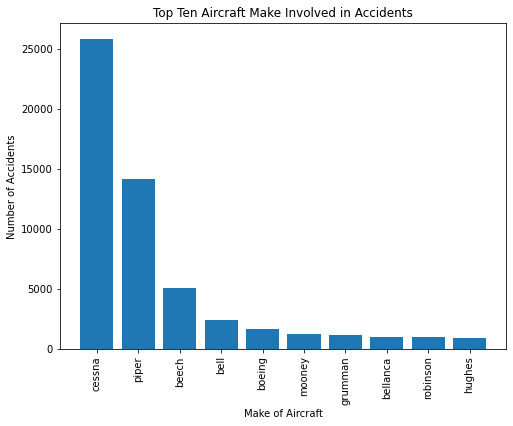

In [17]:
#create a list of the names of the aircraft makes
aircraft_list = aircrafts_df["Make"].value_counts().head(10).index.tolist()
#create a list of the value counts of the aircraft make
aicraft_values = aircrafts_df["Make"].value_counts().head(10).values.tolist()

#create the plot
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(aircraft_list, aicraft_values)
#name the title
ax.set_title('Top Ten Aircraft Make Involved in Accidents')
#name y axis
ax.set_ylabel('Number of Accidents')
#name x axis
ax.set_xlabel('Make of Aircraft')
#rotate the x labels to 90 degrees for better visibility
plt.xticks(rotation=90);


From the graph, we can tell that Cessna is invloved in most accidents

### Aircraft damage

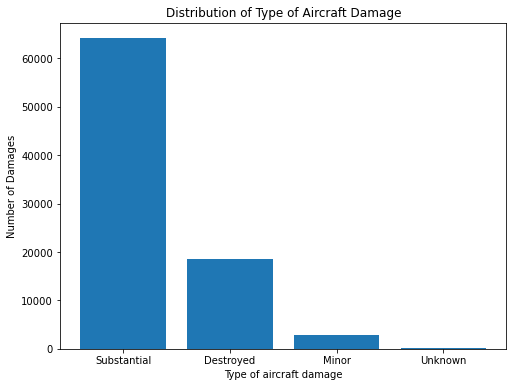

In [18]:
#create a list of names and values of aircraft damage categories
damage_list = aircraft_damage_injuries['Aircraft.damage'].value_counts().index.tolist()
damage_values = aircraft_damage_injuries['Aircraft.damage'].value_counts().values.tolist()

#create the plot
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(damage_list, damage_values)
#name the title
ax.set_title('Distribution of Type of Aircraft Damage')
#name y axis
ax.set_ylabel('Number of Damages')
#name x axis
ax.set_xlabel('Type of aircraft damage');

Most aircrafts sustain substantial amount of damage when they crash. This means that they can be repaired and used again

### Purpose of flight

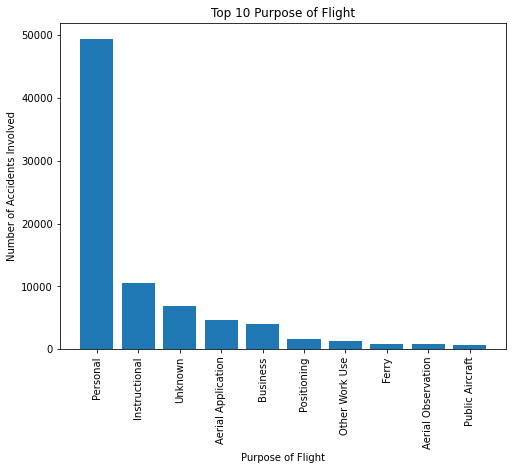

In [26]:
#create a list of names and values of purpose of flight
purpose_list = df['Purpose.of.flight'].value_counts().head(10).index.tolist()
purpose_values = df['Purpose.of.flight'].value_counts().head(10).values.tolist()

#create the plot
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(purpose_list, purpose_values)
#name the title
ax.set_title('Top 10 Purpose of Flight')
#name y axis
ax.set_ylabel('Number of Accidents Involved')
#name x axis
ax.set_xlabel('Purpose of Flight')
#rotate the x labels to 90 degrees for better visibility
plt.xticks(rotation=90);

#save the graph to local folder
plt.savefig("C:/Users/User/Project graphs")

Privately owned planes are the ones prone to accidents. Public and business have low occurences.

### Phase of flight

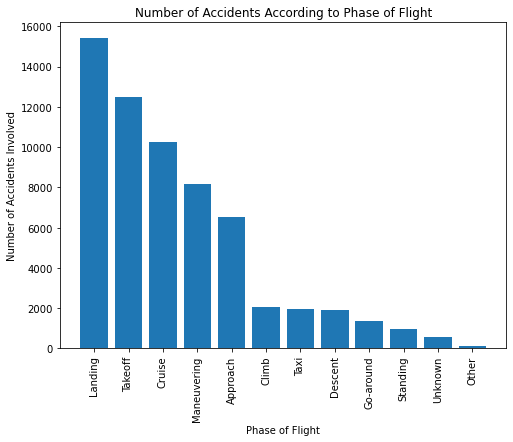

In [20]:
df['Broad.phase.of.flight'].value_counts()

#create a list of names and values of phase of flight
phase_list = df['Broad.phase.of.flight'].value_counts().index.tolist()
phase_values = df['Broad.phase.of.flight'].value_counts().values.tolist()

#create the plot
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(phase_list,phase_values)
#name the title
ax.set_title('Number of Accidents According to Phase of Flight')
#name y axis
ax.set_ylabel('Number of Accidents Involved')
#name x axis
ax.set_xlabel('Phase of Flight')
#rotate the x labels to 90 degrees for better visibility
plt.xticks(rotation=90);


Landing and take off being the most times airplanes get accidents, could be as a result of weather or maybe pilot and/ air traffic controller error. The landing and take offs happen at airports which have high traffic especially for big airports, hence could be a reason for the high occurance.

### Injuries

We'll now plot a bar chart to see the number of people injured compared to the type of injury

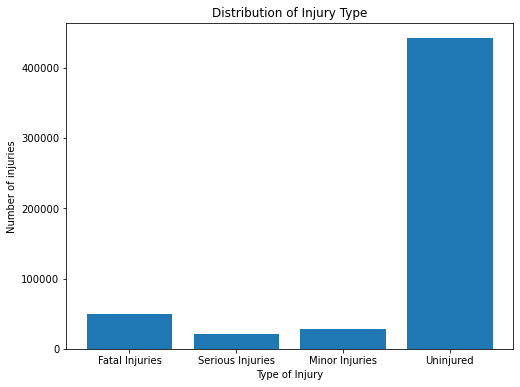

In [27]:
Injuries = [df['Total.Fatal.Injuries'].sum(), df['Total.Serious.Injuries'].sum(), df['Total.Minor.Injuries'].sum(), df['Total.Uninjured'].sum()]
Type_of_injury = ['Fatal Injuries','Serious Injuries', 'Minor Injuries', 'Uninjured' ]

#create the plot
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(Type_of_injury, Injuries)
#name the title
ax.set_title('Distribution of Injury Type')
#name y axis
ax.set_ylabel('Number of injuries')
#name x axis
ax.set_xlabel('Type of Injury');



In most accidents, people are uninjure. This shows that aircrafts are a safe mode of transport.

## Type of engine

A bar chart for the type of engine. 
First, we'll drop the rows containg 'None', 'NONE' and 'Unknown', since they are not types of engines.

In [22]:
# create a list of the values you'd like to drop from the Engine type column
to_drop = ['NONE', 'None', 'Unknown']
#create a new dataframe where the rows have been dropped
aircrafts_df = aircrafts_df[~aircrafts_df['Engine.Type'].isin(to_drop)]
#check if the rows have been droppes by doing a value count
aircrafts_df['Engine.Type'].value_counts()

Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Turbo Jet            703
Geared Turbofan       12
Electric              10
LR                     2
UNK                    1
Hybrid Rocket          1
Name: Engine.Type, dtype: int64

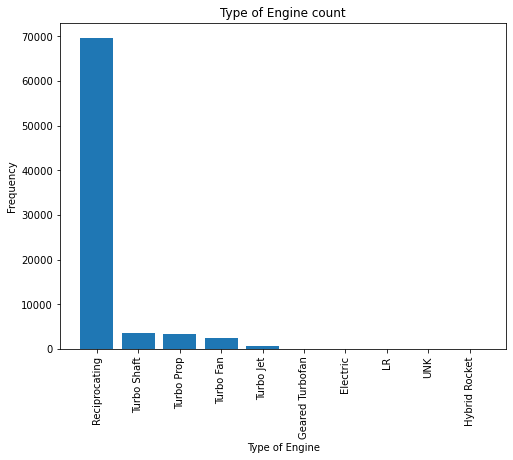

In [23]:
#first we get the list of the names of the engine
engines_list = aircrafts_df["Engine.Type"].value_counts().index.tolist()

#next we get the value counts of the types of engines
engines_values_list = aircrafts_df["Engine.Type"].value_counts().values.tolist()

#plot the bar chart
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(engines_list, engines_values_list)
#name the title
ax.set_title('Type of Engine count')
#name y axis
ax.set_ylabel('Frequency')
#name x axis
ax.set_xlabel('Type of Engine')
#rotate the x labels to 90 degrees for better visibility
plt.xticks(rotation=90);

This is in tandem with the make of aircraft. Most Cessnas and Pipers are small aircrafts which use small engines(reciprocating). From the previous graph we saw that most of the mentioned planes are the ones invloved in most accidents, hence the reason for the same in the above graph.

### Weather Condition

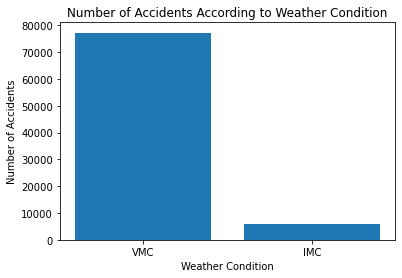

In [24]:
#create a list of the names and values of the weather conditions
weather_list = weather_df.value_counts().index.tolist()
weather_values = weather_df.value_counts().values.tolist()

#create the bar chart
fig, ax = plt.subplots()
ax.bar(weather_list, weather_values)
#name the title
ax.set_title('Number of Accidents According to Weather Condition')
#name y axis
ax.set_ylabel('Number of Accidents')
#name x axis
ax.set_xlabel('Weather Condition');

VMC - Visual meteorological Condition
IMC - Instrument meteorological Condition
VMC is higher because in this condition, the pilot uses visual cues either to take off, or land the plane. Since humans are prone to errors, due to several factors, they'll be faulty, compared to using instruments to guide them. 

## Correlation

Is there a correlation between the number of engines and the injuries sustained? Let's plot a correlation heat map to see.

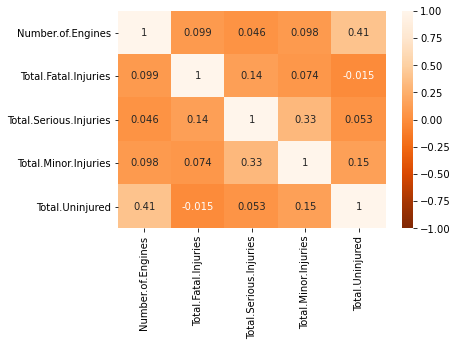

In [25]:
corr = df.corr() #finds the correlations for the dataframe
sns.heatmap(corr,  annot=True, cmap='Oranges_r', vmin=-1); #plots the heatmap according to the correlations found

## 3. Conclusion

From the data analysis, we can see that the most planes involved in accidents are Cessna, Piper and Beech. The majority of these planes have reciprocating/piston engine, again shown from the analysis. One might say that it is not recommended to buy these planes, however the data does not suffice. We could say those are the most common airplanes hence the reason for the popularity in data.
Other factors like price of airplanes, maintenance cost were not put into consideration which can be crucial in the purchase. Therefore, I recommend further analysis from other sources, so as to make a better decision.
